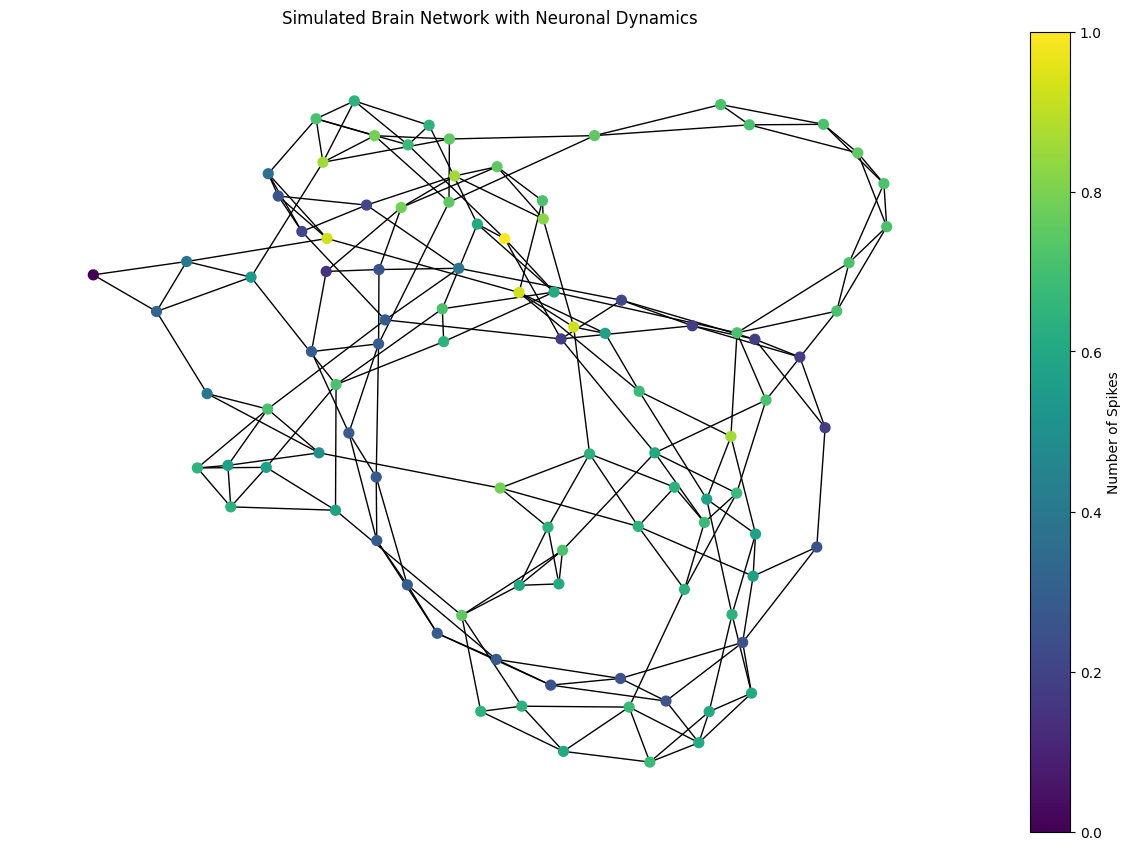

array([33, 36, 37, 37, 37, 37, 37, 37, 37, 37])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Step 1: Create a More Complex Network Model
# Using a small-world network to better represent brain connectivity
network_size = 100
nearest_neighbors = 4  # Each node is connected to its nearest neighbors
rewire_prob = 0.1  # Probability of rewiring each edge
brain_network = nx.watts_strogatz_graph(network_size, nearest_neighbors, rewire_prob)

# Step 2: Incorporate Neuronal Dynamics - Integrate-and-Fire Model
def integrate_and_fire(network, initial_states, threshold=1.0, external_stimulus=None):
    states = initial_states.copy()
    spikes = np.zeros(network_size, dtype=int)

    for _ in range(100):  # Run for 100 time steps
        # Apply external stimulus if present
        if external_stimulus is not None:
            states += external_stimulus

        # Update states based on neighbors
        for node in network.nodes():
            neighbors = list(network.neighbors(node))
            states[node] += sum(states[neighbors]) / len(neighbors)

        # Check for spikes and reset
        for node in range(network_size):
            if states[node] > threshold:
                spikes[node] += 1
                states[node] = 0  # Reset after firing

    return spikes

# Initialize random states and external stimulus
initial_states = np.random.rand(network_size)
external_stimulus = np.random.rand(network_size) * 0.1  # small random stimulus

# Run the simulation
spikes = integrate_and_fire(brain_network, initial_states, external_stimulus=external_stimulus)

# Step 3: Visualization Enhancements
plt.figure(figsize=(12, 8))
nx.draw(brain_network, node_size=50, node_color=spikes, cmap='viridis', with_labels=False)
plt.colorbar(plt.cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), label='Number of Spikes')
plt.title("Simulated Brain Network with Neuronal Dynamics")
plt.show()

spikes[:10]  # Displaying spikes of the first 10 nodes for brevity
